In [1]:
import os
import json
import pandas as pd
from tqdm import tqdm
from ast import literal_eval

from dotenv import find_dotenv, load_dotenv
_ = load_dotenv(find_dotenv())

from llama_index.llms.openai import OpenAI
from llama_index.core.prompts import PromptTemplate

from utils import json_load

In [2]:
# load llm response
response_dir = os.path.join('data', 'source')
response_file_path = os.path.join(response_dir, 'baseline_rag_result_R3.json')
#response_file_path = os.path.join(response_dir, 'baseline_rag_result.json')
response = json_load(response_file_path)
response_df = pd.DataFrame(response)
response_df
#df = pd.merge(df, response_df, how='left', on='query')
#df['reference_contexts'] = df['reference_contexts'].apply(literal_eval)

#df.head(3)

load data from: data/source/baseline_rag_result_R3.json


,query,response,retrieved_nodes,reranked_nodes
0,這門課希望學生從使用者變成什麼？,這門課希望學生從使用者變成創作者。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'f1b8dce2-5b45-4ed8-b44d-0bf6e2306877'...
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,抱歉，無法提供該工具的資訊。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...
2,哪個軟體被用來合成講師的聲音？,沒有提到任何軟體被用來合成講師的聲音。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...
3,這門課的上課時間是週五下午幾點幾分開始？,這門課的上課時間是週五下午2點20分開始。,[{'id': 'f1b8dce2-5b45-4ed8-b44d-0bf6e2306877'...,[{'id': 'f0e22525-58ae-443d-8c9f-024c8a93b944'...
4,前兩個作業的截止日期延後到哪一天繳交？,前兩個作業的截止日期延後到下週一。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'f0e22525-58ae-443d-8c9f-024c8a93b944'...
5,助教預計在幾月幾號把成績送出？,助教預計在1月12號把成績送出。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'f1b8dce2-5b45-4ed8-b44d-0bf6e2306877'...
6,課程中目前保留需要訓練多少時間的作業？,課程中每一個作業通常留給大家三週的時間來完成，前兩個作業的截止日期特別延後到10月17號。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'f1b8dce2-5b45-4ed8-b44d-0bf6e2306877'...
7,如果你對生成式AI一無所知，建議先看哪一門課程？,建議先選修這門課程，因為它提供了基礎的概念講解和實作輔助，適合對生成式AI一無所知的學生。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...


In [3]:
df = response_df.copy()

In [4]:
pipeline_name = os.path.splitext(os.path.basename(response_file_path))[0]
print(pipeline_name)
save_dir = os.path.join('data', 'temp')
os.makedirs(save_dir, exist_ok=True)
save_file_path = os.path.join(save_dir, f"{pipeline_name}_answer_relevancy.csv")
print('write result to:' + save_file_path)

baseline_rag_result_R3
write result to:data/temp/baseline_rag_result_R3_answer_relevancy.csv


In [5]:
from llama_index.core.evaluation import (
    AnswerRelevancyEvaluator,
    ContextRelevancyEvaluator,
)

In [6]:
llm = OpenAI(model="gpt-5-mini", temperature=0, is_streaming=False)

In [7]:
evaluator = AnswerRelevancyEvaluator(llm)

In [8]:
for idx, row in tqdm(df.iterrows(), total=len(df)):
    break

  0%|                                                                                             | 0/8 [00:00<?, ?it/s]


In [9]:
row.query

'這門課希望學生從使用者變成什麼？'

In [10]:
evaluator.evaluate?

Signature:
evaluator.evaluate(
    query: Optional[str] = None,
    response: Optional[str] = None,
    contexts: Optional[Sequence[str]] = None,
    **kwargs: Any,
) -> llama_index.core.evaluation.base.EvaluationResult
Docstring:
Run evaluation with query string, retrieved contexts,
and generated response string.

Subclasses can override this method to provide custom evaluation logic and
take in additional arguments.
File:      ~/miniconda3/envs/rag30/lib/python3.12/site-packages/llama_index/core/evaluation/base.py
Type:      method

In [11]:
result = evaluator.evaluate(query=row.query, response=row.response)
result

EvaluationResult(query='這門課希望學生從使用者變成什麼？', contexts=None, response='這門課希望學生從使用者變成創作者。', passing=None, feedback='1. 回答是否符合使用者詢問的主題？(1 分)\n是。使用者問「這門課希望學生從使用者變成什麼？」回覆直接指明「變成創作者」，主題（學生的轉變目標）被正面回應，因此給 1 分。\n\n2. 回答是否嘗試針對使用者提出的聚焦或角度進行回應？(1 分)\n是。使用者問的是「從使用者變成什麼」，回覆以單一句話明確指出轉換的角色（創作者），符合原問題的角度與重點，因此給 1 分。\n\n總評：回覆簡潔且直接回答問題，但若要更完整可補充為何要成為「創作者」或課程如何達到此目標。  \n[RESULT] 2', score=1.0, pairwise_source=None, invalid_result=False, invalid_reason=None)

In [12]:
result.feedback

'1. 回答是否符合使用者詢問的主題？(1 分)\n是。使用者問「這門課希望學生從使用者變成什麼？」回覆直接指明「變成創作者」，主題（學生的轉變目標）被正面回應，因此給 1 分。\n\n2. 回答是否嘗試針對使用者提出的聚焦或角度進行回應？(1 分)\n是。使用者問的是「從使用者變成什麼」，回覆以單一句話明確指出轉換的角色（創作者），符合原問題的角度與重點，因此給 1 分。\n\n總評：回覆簡潔且直接回答問題，但若要更完整可補充為何要成為「創作者」或課程如何達到此目標。  \n[RESULT] 2'

In [13]:
result.score

1.0

In [14]:
answer_score = []
answer_feedback = []
for idx, row in tqdm(df.iterrows(), total=len(df)):
    query = row.query
    response = row.response
    result = evaluator.evaluate(
        query=query,
        response=response,
    )

    answer_score.append(result.score)
    answer_feedback.append(result.feedback)

df['answer_score'] = answer_score
df['answer_feedback'] = answer_feedback
df.to_csv(save_file_path, index=False)

100%|█████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:58<00:00, 14.82s/it]


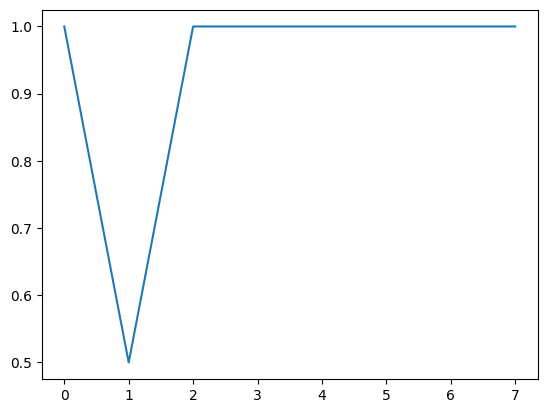